## Preliminary set-up 

choosing important columns

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

Populating the interactive namespace from numpy and matplotlib


In [2]:
xl = pd.ExcelFile('Copy of WI_Manufacturers316.xlsx')
xl.sheet_names

[u'Sheet1', u'Sheet2', u'Sheet3']

df1 = xl.parse("Sheet1")
df1.head()

,Contact Prefix,Contact First Name,Contact Middle Name,Contact Last Name,Contact Suffix,Contact Title,Age,Salary (US Dollars),Bonus (US Dollars),Company Name,...,Bonus (US Dollars)12,Contact Prefix13,Contact First Name13,Contact Middle Name13,Contact Last Name13,Contact Suffix13,Contact Title13,Age13,Salary (US Dollars)13,Bonus (US Dollars)13
0,Mr,Bruce,NaN,Roberts,NaN,Manager,NaN,NaN,YES,Clement Welding & Fabricating Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mr,Jere,NaN,Benedict,NaN,Pres-treas,NaN,NaN,YES,Bencher Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,Pride Abrasive Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mr,Chris,NaN,Clough,NaN,Operations Manager,NaN,NaN,YES,Puratos Corporation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ms,Ida,NaN,Tenuta,NaN,V Pres,NaN,NaN,YES,A T Polishing Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df1)

20065

In [4]:
list(df1)

['Contact Prefix',
 'Contact First Name',
 'Contact Middle Name',
 'Contact Last Name',
 'Contact Suffix',
 'Contact Title',
 'Age',
 'Salary (US Dollars)',
 'Bonus (US Dollars)',
 'Company Name',
 'Primary Address 1',
 'Primary Address 2',
 'Primary City',
 'Primary County',
 'Primary State',
 'Primary Zip',
 'Primary Zip Extension',
 'Primary Country',
 'Phone Number',
 'Toll-Free Number',
 'FAX Number',
 'Mailing Address 1',
 'Mailing Address 2',
 'Mailing City',
 'Mailing County',
 'Mailing State',
 'Mailing Zip',
 'Mailing Zip Extension',
 'Mailing Country',
 'Web Address ',
 'Latitude',
 'Longitude',
 'Line Of Business',
 'Owns Rents',
 'Facility Size (sq Ft)',
 'Is Importer',
 'Is Exporter',
 'D-U-N-S Number',
 'Doing Business As',
 'Company Type',
 'Is Subsidiary',
 'Location Type',
 'Exchange',
 'Symbol',
 'Rankings',
 'Ultimate Parent',
 'Ultimate Parent D-U-N-S',
 'Immediate Parent',
 'Immediate Parent D-U-N-S',
 'Language Preference',
 'Is Manufacturing',
 'Is Women Owned',

possible important columns: Line Of Business, Owns Rents, Facility Size, Is Importer, Is Exporter, Doing Business As, Company Type, Is Subsidiary, Is Manufacturing, Language Preference, Is Women Owned, Is Minority Owned, Fiscal Year-End, Revenue (US Dollars, million), Revenue Growth (%), Net Income (US Dollars, million), Income Growth (%), Total Employees, Employee Growth (%), Total Assets (US Dollars, million), Market Value (US Dollars, million), Primary Industry 

In [5]:
df = df1[['Company Name','Line Of Business','Owns Rents','Facility Size (sq Ft)', 'Is Importer', 'Is Exporter', 'Is Manufacturing', 'Is Women Owned', 'Is Minority Owned', 'Revenue (US Dollars, million)', 'Net Income (US Dollars, million)', 'Total Employees', 'Total Assets (US Dollars, million)', 'Primary Industry' ]]

In [6]:
df.head()

,Company Name,Line Of Business,Owns Rents,Facility Size (sq Ft),Is Importer,Is Exporter,Is Manufacturing,Is Women Owned,Is Minority Owned,"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)",Primary Industry
0,Clement Welding & Fabricating Inc,"Fabricated metal products, nec, nsk",Owns,10000.0,No,No,Yes,No,No,1.400000,0.0,15.0,0.0,Fabricated Metal Product Manufacturing
1,Bencher Inc,Photographic equipment and supplies,Rents,11000.0,No,No,Yes,No,No,1.400000,0.0,12.0,0.0,Photographic & Optical Equipment/Supplies Manu...
2,Pride Abrasive Inc,"Abrasive products, nsk",Rents,11500.0,Yes,No,Yes,Yes,No,1.400000,0.0,17.0,0.0,Abrasives Manufacturing
3,Puratos Corporation,"Food preparations, nec, nsk",NaN,11178.0,No,No,Yes,No,No,1.334543,0.0,NaN,0.0,Food Manufacturing
4,A T Polishing Inc,Plating and polishing,Owns,8335.0,No,No,Yes,No,No,1.500000,0.0,20.0,0.0,Fabricated Metal Product Manufacturing


Some notes: I have kept 'Owns Rents' as I feel it may prove usefule, but it should be noted only about 40% have entries.

It appears that there are companies listed more than once. For now, I will not consolidate them but treat them as separate entities.
Facility Size, Revenue, etc have some NaN's, so be prepared for those.
Net Income has 16924 0's. Total assets likewise has 17177 0's. So these columns have zero's rather than NaN's that should be accounted for.

# Visualization Exploration

## Questions to consider



    Can you count something interesting?

    Can you find some trends (high, low, increase, decrease, anomalies)?

    Can you make a bar plot or a histogram?

    Can you compare two related quantities?

    Can you make a scatterplot?

    Can you make a time-series plot?


In [7]:
df['Is Exporter'].value_counts()

No     18853
Yes     1212
Name: Is Exporter, dtype: int64

In [8]:
df['Is Importer'].value_counts()

No     18372
Yes     1693
Name: Is Importer, dtype: int64

In [9]:
df['Is Manufacturing'].value_counts()

Yes    15226
No      4839
Name: Is Manufacturing, dtype: int64

In [10]:
df.describe()

,Facility Size (sq Ft),"Revenue (US Dollars, million)","Net Income (US Dollars, million)",Total Employees,"Total Assets (US Dollars, million)"
count,1.960700e+04,17218.000000,17218.000000,17249.000000,17218.000000
mean,1.935271e+04,17.614536,0.253996,75.136704,6.028600
std,6.479473e+04,337.095765,18.218770,1266.019418,266.924297
min,0.000000e+00,0.000005,-1178.004000,1.000000,0.000000
25%,2.518000e+03,0.110000,0.000000,2.000000,0.000000
50%,4.204000e+03,0.302094,0.000000,4.000000,0.000000
75%,1.386000e+04,1.700000,0.000000,15.000000,0.000000
max,3.300000e+06,37179.000000,1563.000000,139000.000000,29673.000000


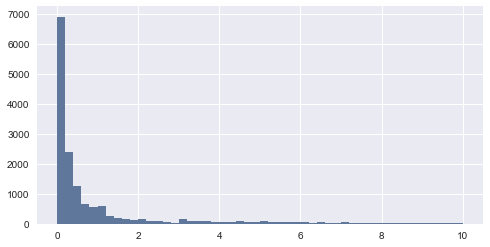

In [11]:
x = df1['Revenue (US Dollars, million)'].dropna()

plt.hist(x,bins=50, range = [0, 10])
plt.show()

The revenue is heavily skewed to the low end. This makes sense in that most of these companies are smaller.

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


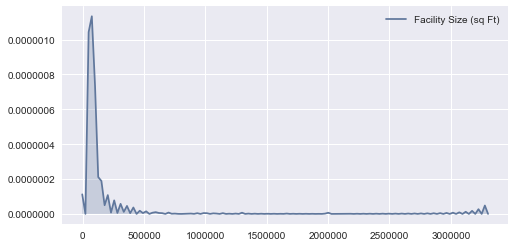

In [12]:
sns.kdeplot(df['Facility Size (sq Ft)'].dropna(), shade=True)


The facility size is likewise skewed to the low end with a few very large outliers.

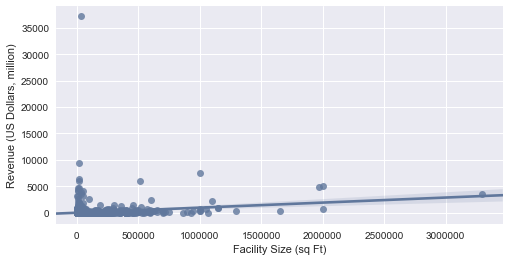

In [69]:
sns.regplot(y=df['Revenue (US Dollars, million)'], x=df['Facility Size (sq Ft)'], fit_reg = True)

In [62]:
a = np.zeros(shape=(len(df),1))

In [32]:
df['Export']= pd.DataFrame(a)

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
for i in range(len(df['Is Exporter'])): #Creating a new column called export that is all zeros, and changing the value to 1's or 0's 
    if df['Is Exporter'][i] == 'Yes':
        df['Export'].set_value(i, 1)

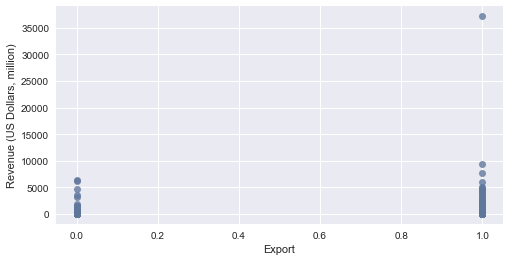

In [68]:
sns.regplot(y=df['Revenue (US Dollars, million)'], x=df['Export'], fit_reg = False)

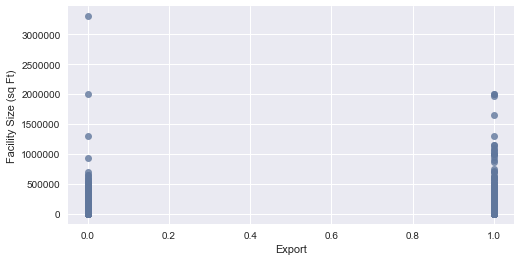

In [67]:
sns.regplot(y=df['Facility Size (sq Ft)'], x=df['Export'], fit_reg = False)

There appears to be an upward trend in revenue between exporters compared to non-exporters, and similar with facility. However, a better measure, according to theory, is productivity. So I want to compute revenue per employee, facility per employee, and revenue per facility to look at trends there.

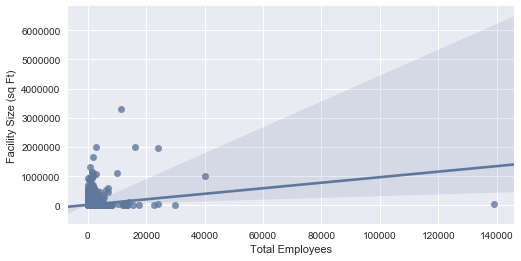

In [63]:
sns.regplot(y=df['Facility Size (sq Ft)'], x=df['Total Employees'], fit_reg = True)

So far these are not comparisons between exporters and non, but this last one provides a the first real clear correlation trend.

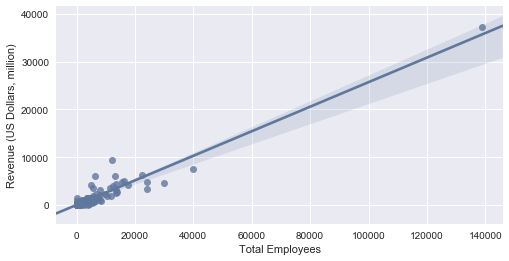

In [50]:
sns.regplot(y=df['Revenue (US Dollars, million)'], x=df['Total Employees'], fit_reg = True)

In [44]:
mask = ~np.isnan(df['Total Employees']) & ~np.isnan(df['Revenue (US Dollars, million)'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Total Employees'][mask], df['Revenue (US Dollars, million)'][mask])

In [47]:
print('Revenue = ' + str(slope) + '*Employees + ' + str(intercept))

Revenue = 0.257081744012*Employees + -1.14749808441


In [54]:
#Creating the comparisson values.
RevPerEm = df['Revenue (US Dollars, million)']/df['Total Employees']
RevPerSq =df['Revenue (US Dollars, million)']/df['Facility Size (sq Ft)']
SqPerEm = df['Facility Size (sq Ft)']/df['Total Employees']

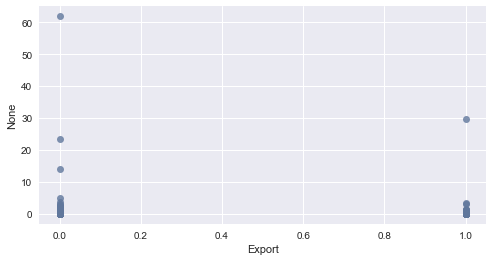

In [71]:
sns.regplot(y=RevPerEm, x=df['Export'], fit_reg = False)

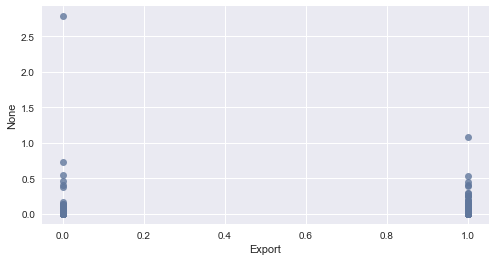

In [72]:
sns.regplot(y=RevPerSq, x=df['Export'], fit_reg = False)

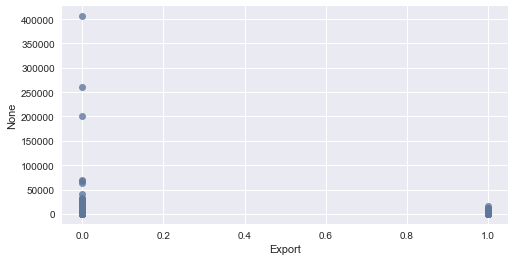

In [73]:
sns.regplot(y=SqPerEm, x=df['Export'], fit_reg = False)

In [58]:
export_yes = df[df['Is Exporter'] == 'Yes']
export_no = df[df['Is Exporter'] == 'No']

In [59]:
yes_RevPerEm = export_yes['Revenue (US Dollars, million)']/export_yes['Total Employees']
yes_RevPerSq =export_yes['Revenue (US Dollars, million)']/export_yes['Facility Size (sq Ft)']
yes_SqPerEm = export_yes['Facility Size (sq Ft)']/export_yes['Total Employees']

no_RevPerEm = export_no['Revenue (US Dollars, million)']/export_no['Total Employees']
no_RevPerSq =export_no['Revenue (US Dollars, million)']/export_no['Facility Size (sq Ft)']
no_SqPerEm = export_no['Facility Size (sq Ft)']/export_no['Total Employees']

In [61]:
no_SqPerEm.describe(), yes_SqPerEm.describe()

(count     15642.000000
 mean       1346.549110
 std        4457.916004
 min           0.046000
 25%         600.000000
 50%        1100.000000
 75%        1641.500000
 max      406000.000000
 dtype: float64, count     1202.000000
 mean      1035.093049
 std       1262.358990
 min          0.248662
 25%        325.000000
 50%        734.731629
 75%       1363.636364
 max      17142.857143
 dtype: float64)

In [74]:
no_RevPerSq.describe(), yes_RevPerSq.describe()

(count    1.565600e+04
 mean              inf
 std               NaN
 min      2.626050e-10
 25%      4.041383e-05
 50%      7.453809e-05
 75%      1.941078e-04
 max               inf
 dtype: float64, count    1.166000e+03
 mean     6.797815e-03
 std      4.709103e-02
 min      5.212334e-07
 25%      9.290342e-05
 50%      2.451423e-04
 75%      6.278297e-04
 max      1.075657e+00
 dtype: float64)

This one is thrown off a bit by the infinite point, but there is a higher 75 percentile in the yes.

In [75]:
no_RevPerEm.describe(), yes_RevPerEm.describe()

(count    1.568100e+04
 mean     1.245914e-01
 std      5.564048e-01
 min      1.315789e-07
 25%      5.766033e-02
 50%      8.415600e-02
 75%      1.300000e-01
 max      6.188920e+01
 dtype: float64, count    1175.000000
 mean        0.236956
 std         0.883243
 min         0.000206
 25%         0.095500
 50%         0.170236
 75%         0.274581
 max        29.685864
 dtype: float64)

Here there is about 2x higher mean for the exporters. 

# Conclusion

The companies in this data set are primarily on the smaller side with a dramatic skew toward the small revenue and employee size, etc.

Looking at all these visulaizations, it seems that the most dramatic relationships are between revenue and employees and revenue and facility size. These show up as correlation in the scatterplots and in a comparison of the means.